In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [3]:
!dir

 D 드라이브의 볼륨: ESD-USB
 볼륨 일련 번호: 6E5E-32E4

 D:\BigData\project\High_school 디렉터리

2020-11-05  오후 02:38    <DIR>          .
2020-11-05  오후 02:38    <DIR>          ..
2020-11-06  오후 12:19               345 학교이름 수정.txt
2020-11-05  오후 02:38    <DIR>          data
2020-11-06  오전 11:59            88,263 1106 project_1.ipynb
2020-11-05  오후 02:39    <DIR>          발표자료
2020-11-06  오후 02:21            15,986 high_juso.ipynb
2020-11-08  오전 11:30           112,735 high_land.ipynb
2020-11-05  오후 02:41    <DIR>          .ipynb_checkpoints
2020-11-06  오후 06:43             2,508 입학현황 크롤링.ipynb
2020-11-06  오후 03:50           867,063 년도별서울대입학시각화.ipynb
2020-11-09  오후 12:28           355,667 high_v.ipynb
2020-11-09  오후 11:24           225,736 20201109 병합함수.ipynb
2020-11-10  오전 12:01           165,781 부동산가격 수정분석.ipynb
2020-11-09  오후 12:38           647,605 부동산.ipynb
2020-11-09  오후 11:28            47,232 최종분석.ipynb
2020-11-10  오전 10:13           213,248 최종최종분석1.ipynb
2020-11-05  오후 02:59             1,947 

In [4]:
df = pd.read_excel('D:\\BigData\\project\\High_school\\data\\서울대출신고등학교수정1.xlsx',index_col=0)
df.head(1)

,학교명,2020(총합),2020(정시),2020(수시),2019(총합),2019(정시),2019(수시),2018(총합),2018(정시),2018(수시),...,2014(총합),2014(정시),2014(수시),2013(총합),2013(정시),2013(수시),위도,경도,주소,"시,구"
0,외대부고등학교,69,39,30,73.0,36.0,37.0,55,24,31,...,92,34.0,58.0,45.0,20.0,25.0,37.330141,127.253816,경기도 용인시 처인구 모현면 왕산리 232,용인시


In [5]:
df['도'] = df.주소.apply(lambda x : x.split(' ')[0])

In [6]:
df_dic = {}   # key : 년도, value: 학고명~,도 로하는 DataFrame
for i in range(2013,2021) :
    sub = str(i)+'(총합)'
    sub1 = str(i)+'(수시)'
    sub2 = str(i)+'(정시)'
    df1 = df[['학교명',sub,sub1,sub2,'위도','경도','주소','시,구','도']].sort_values(sub,ascending = False)[:50]
    df_dic[i] = df1

In [30]:
df_dic[2019]

,학교명,2019(총합),2019(수시),2019(정시),위도,경도,주소,"시,구",도
0,외대부고등학교,73.0,37.0,36.0,37.330141,127.253816,경기도 용인시 처인구 모현면 왕산리 232,용인시,경기도
2,대원외고등학교,53.0,33.0,20.0,37.563696,127.086938,서울특별시 광진구 중곡4동 용마산로22길 26,광진구,서울특별시
1,하나고등학교,51.0,49.0,2.0,37.641704,126.935000,서울특별시 은평구 진관동 연서로 535,은평구,서울특별시
3,상산고등학교,38.0,13.0,25.0,35.804418,127.116505,전라북도 전주시 완산구 효자동1가 거마평로 130,전주시,전라북도
7,민사고등학교,31.0,22.0,9.0,37.459916,128.140988,강원도 횡성군 안흥면 봉화로 800,횡성군,강원도
14,단대부고등학교,28.0,9.0,19.0,37.247699,126.576251,경기도 안산시 단원구 대부북동 697-6,안산시,경기도
6,명덕외고등학교,26.0,22.0,4.0,37.554071,126.831206,서울특별시 강서구 발산1동 강서로47길 34-10,강서구,서울특별시
9,세화고등학교,25.0,7.0,18.0,37.502164,126.991056,서울특별시 서초구 반포동 신반포로 56-7,서초구,서울특별시
11,휘문고등학교,24.0,5.0,19.0,37.504844,127.060391,서울특별시 강남구 대치동 역삼로 541,강남구,서울특별시
17,포항제철고등학교,23.0,18.0,5.0,36.029002,129.325822,경상북도 포항시 남구 효곡동 지곡로212번길 40,포항시,경상북도


In [7]:
df_dic[2013].head(2)

,학교명,2013(총합),2013(수시),2013(정시),위도,경도,주소,"시,구",도
2,대원외고등학교,83.0,39.0,44.0,37.563696,127.086938,서울특별시 광진구 중곡4동 용마산로22길 26,광진구,서울특별시
3,상산고등학교,52.0,24.0,28.0,35.804418,127.116505,전라북도 전주시 완산구 효자동1가 거마평로 130,전주시,전라북도


##### 년도별 학교 list

In [8]:
list(df_dic[2013].학교명)

['대원외고등학교',
 '상산고등학교',
 '외대부고등학교',
 '하나고등학교',
 '민사고등학교',
 '대일외고등학교',
 '명덕외고등학교',
 '세종과고등학교',
 '휘문고등학교',
 '안산동산고등학교',
 '포항제철고등학교',
 '안양외고등학교',
 '고양외고등학교',
 '경남과고등학교',
 '한일고등학교',
 '한영외고등학교',
 '경기북과고등학교',
 '단대부고등학교',
 '인천과고등학교',
 '중산고등학교',
 '공주사대부고등학교',
 '경신고등학교',
 '세화고등학교',
 '중동고등학교',
 '대전외고등학교',
 '경기외고등학교',
 '서울고등학교',
 '대륜고등학교',
 '숙명여고등학교',
 '서라벌고등학교',
 '부산외국어고등학교',
 '중대부고등학교',
 '낙생고등학교',
 '세광고등학교',
 '상문고등학교',
 '양정고등학교',
 '인천국제고등학교',
 '고려고등학교',
 '서울국제고등학교',
 '진선여고등학교',
 '논산대건고등학교',
 '한영고등학교',
 '반포고등학교',
 '강서고등학교',
 '진주동명고등학교',
 '보인고등학교',
 '과천외고등학교',
 '청심국제고등학교',
 '대진고등학교',
 '부산장안고등학교']

In [9]:
df_dic[i].학교명.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11,  8, 12, 13, 14, 15, 18,
            16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 34, 33, 29, 31,
            30, 35, 36, 37, 38, 39, 40, 41, 42, 46, 45, 44, 43, 47, 48, 49],
           dtype='int64')

In [10]:
name_dic={}   # 년도별 학교 / key: 연도, vales : col이 [index, 학교명]인 DataFrame

for i in range(2013,2021):
    name_dic[i] = df_dic[i].학교명

##### 년도별 학교 구분(색) 지도에 표시

In [11]:
lat = df.위도.mean()
long = df.경도.mean()
m = folium.Map([lat,long], zoom_start = 8,tiles = 'CartoDB positron')

for i in range(2013, 2021):
    df_num = df_dic[i]
    if i == 2013 :
        Color = 'Red'
        Radius = 15
    elif i == 2014 :
        Color = 'Orange'
        Radius=13
    elif i == 2015 :
        Color = 'Yellow'
        Radius=11
    elif i == 2016 :
        Color = 'Green'
        Radius=10
    elif i == 2017 :
        Color = 'Blue'
        Radius=9 
    elif i == 2018 :
        Color = 'Indigo'
        Radius=8 
    elif i == 2019 :
        Color = 'Purple'
        Radius=7 
    else :
        Color = 'Black'
        Radius=5
        
        
    for j in df_num.index :
        sub_lat = df_num.loc[j,'위도']
        sub_long = df_num.loc[j,'경도']
        folium.CircleMarker([sub_lat,sub_long],color = None, fill = True, fill_color = Color, radius= Radius,fill_opacity=10 ).add_to(m)

In [12]:
m  # 고등학교 년도별 mapping 완료

##### 지역별로 연도별 합격자 수 추이분석(서울지역)

In [13]:
df_dic[2013][df_dic[2013]['도'] == '서울특별시']  # 2013년도 서울특별시

,학교명,2013(총합),2013(수시),2013(정시),위도,경도,주소,"시,구",도
2,대원외고등학교,83.0,39.0,44.0,37.563696,127.086938,서울특별시 광진구 중곡4동 용마산로22길 26,광진구,서울특별시
1,하나고등학교,44.0,42.0,2.0,37.641704,126.935000,서울특별시 은평구 진관동 연서로 535,은평구,서울특별시
5,대일외고등학교,41.0,31.0,10.0,37.613812,127.011809,서울특별시 성북구 정릉4동 서경로 116,성북구,서울특별시
6,명덕외고등학교,36.0,17.0,19.0,37.554071,126.831206,서울특별시 강서구 발산1동 강서로47길 34-10,강서구,서울특별시
8,세종과고등학교,30.0,30.0,0.0,37.497194,126.825348,서울특별시 구로구 수궁동 오리로21길 79,구로구,서울특별시
11,휘문고등학교,30.0,8.0,22.0,37.504844,127.060391,서울특별시 강남구 대치동 역삼로 541,강남구,서울특별시
40,안산동산고등학교,29.0,25.0,4.0,37.534835,126.884759,서울특별시 양천구 목5동 안양천로 1039,양천구,서울특별시
25,경남과고등학교,20.0,20.0,0.0,37.490542,127.051492,서울특별시 강남구 도곡2동 남부순환로 2807,강남구,서울특별시
4,한영외고등학교,19.0,15.0,4.0,37.548068,127.155036,서울특별시 강동구 상일동 동남로 832,강동구,서울특별시
21,중산고등학교,16.0,6.0,10.0,37.536381,126.864367,서울특별시 양천구 목4동 목동중앙남로 27,양천구,서울특별시


In [14]:
pd.DataFrame(df_dic[2013][df_dic[2013]['도'] == '서울특별시'].groupby('시,구')['2013(총합)'].sum())  # 2013 시구, 지역별 총합

,2013(총합)
"시,구",
강남구,65.0
강동구,19.0
강서구,58.0
광진구,83.0
구로구,30.0
노원구,16.0
도봉구,19.0
서초구,49.0
성동구,12.0


In [15]:
# 연도별 지역 합격자 수 col = [지역명, 합격자수]
g_d = {}
for i in range(2013,2021):
    ind = str(i)+'(총합)'
    g_d[i] = pd.DataFrame(df_dic[i][df_dic[i]['도'] == '서울특별시'].groupby('시,구')[ind].sum())

In [16]:
df_gu = pd.concat([g_d[2013],g_d[2014],g_d[2015],g_d[2016],g_d[2017],g_d[2018],g_d[2019],g_d[2020]], axis=1)

In [17]:
df_gu.index

Index(['강남구', '강동구', '강서구', '광진구', '구로구', '노원구', '도봉구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '은평구', '종로구', '중구', '강북구'],
      dtype='object')

In [18]:
df_gg = df_gu.T

In [19]:
df_gg.index = list(range(2013,2021))

In [27]:
df_gg.columns

Index(['강남구', '강동구', '강서구', '광진구', '구로구', '노원구', '도봉구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '은평구', '종로구', '중구', '강북구'],
      dtype='object')

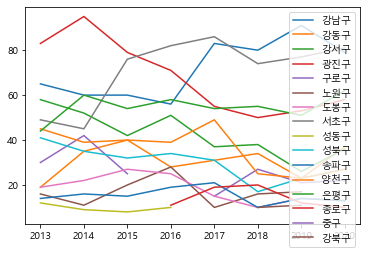

In [20]:
df_gg.plot()

In [28]:
df_gg

,강남구,강동구,강서구,광진구,구로구,노원구,도봉구,서초구,성동구,성북구,송파구,양천구,은평구,종로구,중구,강북구
2013,65.0,19.0,58.0,83.0,30.0,16.0,19.0,49.0,12.0,41.0,14.0,45.0,44.0,10.0,9.0,NaN
2014,60.0,35.0,52.0,95.0,42.0,11.0,22.0,45.0,9.0,35.0,16.0,39.0,60.0,NaN,NaN,7.0
2015,60.0,40.0,42.0,79.0,25.0,20.0,27.0,76.0,8.0,32.0,15.0,40.0,54.0,NaN,NaN,NaN
2016,56.0,28.0,51.0,71.0,NaN,28.0,25.0,82.0,10.0,34.0,19.0,39.0,58.0,11.0,10.0,NaN
2017,83.0,31.0,37.0,55.0,15.0,10.0,15.0,86.0,NaN,31.0,21.0,49.0,54.0,19.0,NaN,NaN
2018,80.0,34.0,38.0,50.0,27.0,16.0,10.0,74.0,NaN,17.0,10.0,25.0,55.0,20.0,NaN,10.0
2019,91.0,23.0,26.0,53.0,21.0,17.0,14.0,77.0,NaN,23.0,14.0,23.0,51.0,12.0,NaN,11.0
2020,79.0,37.0,36.0,58.0,22.0,NaN,13.0,81.0,NaN,27.0,13.0,27.0,62.0,10.0,NaN,NaN
